## Natural Language Processing - Summer Term 2024
### Hochschule Karlsruhe
### Lecturer: Prof. Dr. Jannik Strötgen
### Tutor: Paul Löhr


### Leonard Baumgarten (bale1025), Matrikelnummer: 80169
### Max Dachtler (dama1029), Matrikelnummer: 80093
### Daniel Valpa (vada1011), Matrikelnummer: 79821

# Exercise 06 Part 2

### You will learn about:

- Text Similarity
- TF-IDF Vectors and Cosine Similarity
- Basic Search Engine
---

## Task 1 - Search Engine for Resumes:

### Part 1:
Read the resumes from resumes.csv. Drop duplicated rows and filter for the Categories: PMO, Database, Hadoop, ETL Developer, DotNet Developer, Blockchain

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

# Neue imports
from nltk.tokenize import word_tokenize
import string
from typing import List, Union
nltk.download('wordnet')
import numpy as np
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Overview

In [3]:
df = pd.read_csv("resumes.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

#### Drop duplicate rows

In [6]:
df = df.drop_duplicates()

#### Filter for catrgories

In [7]:
relevant_categories = ["PMO", "Database", "Hadoop", "ETL Developer", "DotNet Developer", "Blockchain"]
df = df[df.Category.isin(relevant_categories)]

In [8]:
df.shape

(38, 2)

---

### Part 2:
Create a new column in the DataFrame named 'Processed_Resume'
Preprocess the resumes. Which steps are usefull? Tokenization? Stopwords? Stemming? Lowercase? ...

- lower case might be a good idea, although programming languages might be not recognized as proper words in future preprocessing steps.
- tokenization is necessary to separate the text corpus into smaller units
- as long as stemming does not change the spelling of programming languages, it might be fitting as well
- stopwords removal will decrease the noise in the tf-id matrix



#### Example resume

In [9]:
df["Resume"].iloc[25]

"Computer skills: - Yes. SQL knowledge-yes Unix knowledge-yes Data warehouse knowledge-yes Ab intio -yee MY HOBBIES: - â\x80¢ Playing Cricket, football. â\x80¢ Reading books â\x80¢ Visiting new places/Travelling. DECLARATION:- I hereby declare that the above mentioned information is factual and correct up to the best of my knowledge and belief. Date: -.27.01.2019 MR. MANISH PRABHAKAR PATIL Place: -MUMBAI Education Details \r\nJune 2014 to June 2015 Bachelor's Electronics and Telecommunication  A C Patil college of Engineering\r\nJanuary 2009 to January 2011  Engineering Navi Mumbai, Maharashtra Bharati vidyapeeth\r\nJanuary 2008 H.S.C.  Mumbai, Maharashtra Khalsa college\r\nETL Informatica Developer \r\n\r\nETL DEVELOPER\r\nSkill Details \r\nETL- Exprience - Less than 1 year months\r\nData Warehouse- Exprience - Less than 1 year months\r\nDatastage- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Reliance Infocomm\r\ndescription - I havevbeen working as ETL Developer i

#### Preprocess resumes

In [10]:
def process_document(document: str, normalizer: Union['stemmer', 'lemmatizer']) -> List[str]:

    stop_words = set(stopwords.words('english')) # define stop words
    frequent_terms = ["software", "technical", "skills", "expertise", "skill", "detail", "details", "exprience"] # define frequent terms

    doc = document.lower() # convert words to lowercase
    doc = word_tokenize(document) # tokenize words

    # remove stop words, punctuation marks, non-ASCII letters (line breaks) and frequent terms
    doc = [token for token in doc if not token in stop_words and not token in string.punctuation and token.isprintable() and not token in frequent_terms]

    if normalizer.lower() == 'stemmer':

        stemmer = PorterStemmer() # define stemmer
        doc = [stemmer.stem(token) for token in doc] # stem tokens
    
    elif normalizer.lower() == "lemmatizer":

        lemmatizer = WordNetLemmatizer() # define lemmatizer
        doc = [lemmatizer.lemmatize(token) for token in doc] # lemmatize tokens
    
    doc = ' '.join(doc)

    return doc

In [11]:
df["Processed_Resume"] = df["Resume"].apply(lambda x: process_document(x, normalizer='lemmatizer'))
df["Processed_Resume"].head()

679    CORE COMPETENCIES Maintain process ensure proj...
680    AREA OF EXPERTISE PROFILE Around 10 plus year ...
681    Skills Exceptional communication networking Su...
709    TECHNICAL EXPERTISE DB Languages SQL Database ...
710    Technical Expertise Operating Systems Microsof...
Name: Processed_Resume, dtype: object

---

### Part 3:
Calculate the Similarity Matrix for df['Resume'] and df['Processed_Resume] and plot both matrices side by side. Discuss your results.

In [12]:
df = df.reset_index(drop = True)

In [13]:
tfid_vec = TfidfVectorizer()
tfid_vec_lemmatize = TfidfVectorizer()
tfid_vec_stem = TfidfVectorizer()


resume_tfidf_matrix = tfid_vec.fit_transform(df["Resume"]).toarray()
processed_resume_tfidf_matrix = tfid_vec_lemmatize.fit_transform(df["Processed_Resume"]).toarray()
stemmed_processed_resume_tfidf_matrix = tfid_vec_stem.fit_transform(df["Resume"].apply(lambda x: process_document(x, normalizer='stemmer'))).toarray()

In [25]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

tfid_unprocessed = tfidf_vectorizer.fit_transform(df['Resume'])
tfid_lemmatized = tfidf_vectorizer.fit_transform(df['Processed_Resume'])

Text(0.5, 1.0, 'Lemmatized')

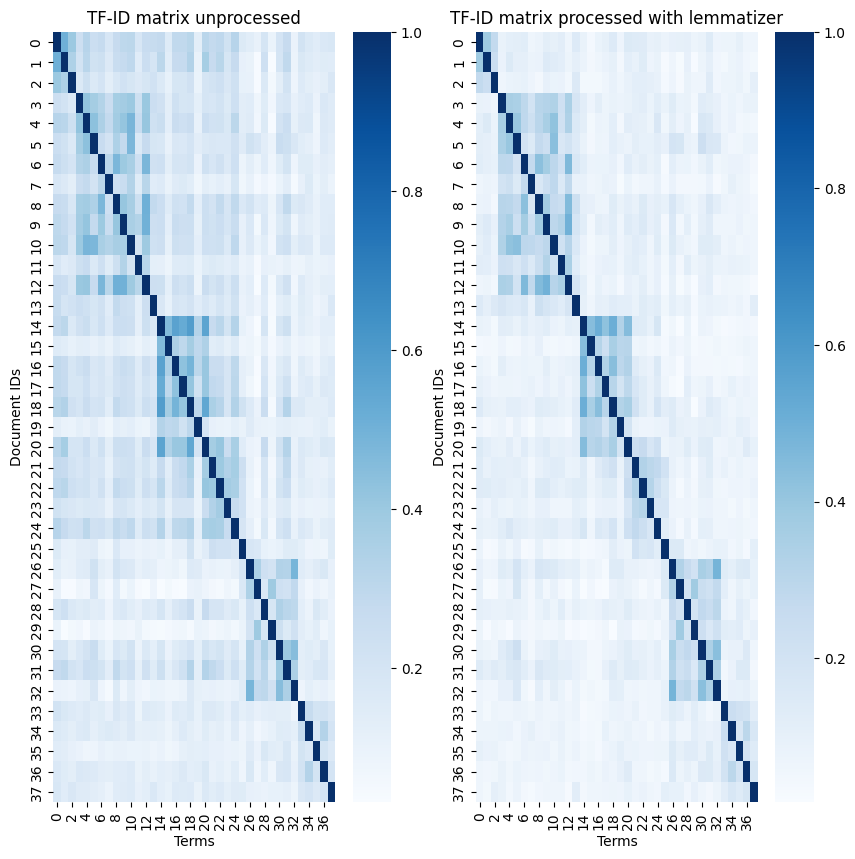

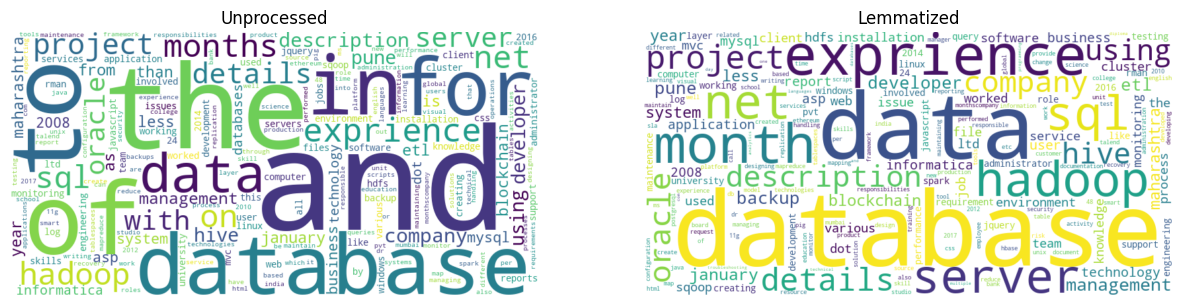

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,10))

s1 = sns.heatmap(cosine_similarity(tfid_unprocessed), cmap="Blues", ax = ax1)
s2 = sns.heatmap(cosine_similarity(tfid_lemmatized), cmap="Blues", ax = ax2)

s1.set_xlabel('Terms', fontsize=10)
s1.set_ylabel('Document IDs', fontsize=10)
s1.set_title("TF-ID matrix unprocessed")

s2.set_xlabel('Terms', fontsize=10)
s2.set_ylabel('Document IDs', fontsize=10)
s2.set_title("TF-ID matrix processed with lemmatizer")

# sum tf_idf values for each word over all documents
tfidf_sum_1 = np.sum(resume_tfidf_matrix, axis=0)
tfidf_sum_2 = np.sum(processed_resume_tfidf_matrix, axis=0)
tfidf_sum_3 = np.sum(stemmed_processed_resume_tfidf_matrix, axis=0)


words1 = tfid_vec.get_feature_names_out() # extract corresponding words from vectorizer
words2 = tfid_vec_lemmatize.get_feature_names_out()
words3 = tfid_vec_stem.get_feature_names_out()

# merge words and sums into a dictionary
word_tfidf_dict_1 = dict(zip(words1, tfidf_sum_1))
word_tfidf_dict_2 = dict(zip(words2, tfidf_sum_2))
word_tfidf_dict_3 = dict(zip(words3, tfidf_sum_3))

# create wordclouds
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict_1) # create wordcloud from dictionary
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict_2) # create wordcloud from dictionary
wordcloud_3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_dict_3) # create wordcloud from dictionary

# plot wordclouds
fig2, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(wordcloud_1, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Unprocessed')

axes[1].imshow(wordcloud_2, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Lemmatized')

The removal of stop words and punctuation marks leads to a noise removal in the second matrix. 

Some documents' similarity values stay the same which is probably because they indeed have the same or at least very similiar words in their text corpus. Those words will stay the same after processing or get processed to the same result.

Stemming leads to the same similarity matrix like lemmatizing.

#### Doc 14 and Doc 15 include the same terms (Hadoop, Data) ####

In [56]:
df["Processed_Resume"].iloc[14]

"Education Details Hadoop Developer Hadoop Developer INFOSYS Skill Details Company Details company INFOSYS description Project Description The banking information stored data different data ware house system department becomes difficult organization manage data perform analytics past data combined single global repository Hadoop analysis Responsibilities Analyze banking rate data set Create specification document Provide effort estimation Develop SPARK Scala SPARK SQL Programs using Eclipse IDE Windows/Linux environment Create KPI 's test scenario test case test result document Test Scala program Linux Spark Standalone mode setup multi cluster AWS deploy Spark Scala program Provided solution using Hadoop ecosystem HDFS MapReduce Pig Hive HBase Zookeeper Provided solution using large scale server-side system distributed processing algorithm Created report BI team using Sqoop export data HDFS Hive Provided solution supporting assisting troubleshooting optimization MapReduce job Pig Latin

In [57]:
df["Processed_Resume"].iloc[15]

'Skill Set Hadoop Map Reduce HDFS Hive Sqoop java Duration 2016 2017 Role Hadoop Developer Rplus offer quick simple powerful cloud based Solution Demand Sense accurately predict demand product market Combines Enterprise External Data predict demand accurately Uses Social Conversation Sentiments derive demand Identifies significant driver sale horde factor Selects best suited model multiple forecasting model product Responsibilities Involved deploying product customer gathering requirement algorithm optimization backend product Load transform Large Datasets structured semi structured Responsible manage data coming different source application Supported Map Reduce Programs running cluster Involved creating Hive table loading data writing hive query run internally map reduce way.Education Details Hadoop Developer Hadoop Developer Braindatawire Skill Details APACHE HADOOP HDFS- Exprience 49 month APACHE HADOOP SQOOP- Exprience 49 month Hadoop- Exprience 49 month HADOOP- Exprience 49 month 

---

### Part 4:
Create the function search(query). Calculate the TF-IDF Vector for the query and match it with all document vectors of the corpus using the cosine_similarity(). Rank all documents by cosine_similarity().

In [44]:
def search(query,  normalizer = "lemmatizer"):
    df.reset_index(drop = True, inplace = True)
    print(f"Search results for query: {query}")

    query = process_document(query, normalizer = normalizer)
    
    # Transform the query and corpus using the TF-IDF vectorizer
    # token_pattern is required to make the vectorizer transform single characters like 'c', 'c++', 'R' etc.
    # the default token_pattern accepts only words with at least two characters (token_pattern='(?u)\\b\\w\\w+\\b',)
    # source: https://stackoverflow.com/questions/64613067/sklearn-tf-idf-tfidfvectorizer-failed-to-capture-one-letter-words
    tf_vec = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')
    processed_matrix = tf_vec.fit_transform(df["Resume"].apply(lambda x: process_document(x, normalizer))).toarray()
    query_matrix = tf_vec.transform([query]).toarray()
    
    # Calculate cosine similarity
    cos_matrix = cosine_similarity(query_matrix, processed_matrix).flatten()
    # create a dataframe with the document ids and corresponding cosine similarities
    df_cos = pd.DataFrame(cos_matrix, columns = ["cosine_similarity"]).sort_values(by = "cosine_similarity", ascending = False)
    df_cos.index.name = "Document ID"

    # append the original unprocessed resumes to the dataframe
    df_cos = df_cos.merge(df[["Category", "Resume"]], how = "left", left_index = True, right_index = True)

    print(f"Query after processing: {query}")

    df_cos = df_cos[df_cos.cosine_similarity > 0]
    # create the rank
    df_cos["rank"] = df_cos["cosine_similarity"].rank(ascending = False)
    
    return df_cos[["rank", "cosine_similarity", "Category", "Resume"]]

In [32]:
search('ethereum  smart contract')

Search results for query: ethereum  smart contract
Query after processing: ethereum smart contract


,rank,cosine_similarity,Category,Resume
Document ID,,,,
36,1.0,0.311805,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper..."
35,2.0,0.117889,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth..."
33,3.0,0.109347,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...
34,4.0,0.102854,Blockchain,Skills Strong CS fundamentals and problem solv...
37,5.0,0.072369,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,..."
11,6.0,0.023276,Database,"Areas of Expertise â¢ Oracle Databases 12c, 1..."


<Axes: >

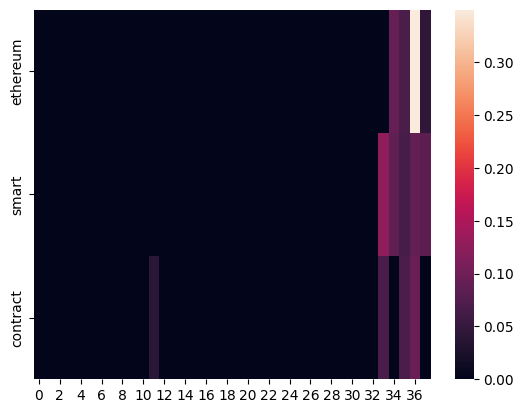

In [17]:
def show_query_tf_idf_matrix(text,  normalizer = "lemmatizer"):

    text = process_document(text, normalizer = normalizer)
    
    tf_vec = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')

    processed_matrix = tf_vec.fit_transform(df["Processed_Resume"])
    query_matrix = tf_vec.transform(text.split(" "))
    cos_matrix = cosine_similarity(query_matrix, processed_matrix)
    return sns.heatmap(cos_matrix, yticklabels = text.split(" "))

show_query_tf_idf_matrix('ethereum  smart contract')

In [18]:
search("R c++ C#")

Search results for query: R c++ C#
Query after processing: R c++ C


,rank,cosine_similarity,Category,Resume
Document ID,,,,
26,1.0,0.236550,DotNet Developer,TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...
35,2.0,0.149020,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth..."
13,3.0,0.139786,Database,"TECHNICAL SKILLS â¢ SQL â¢ Oracle v10, v11, ..."
19,4.0,0.122013,Hadoop,"Technical Skills Programming Languages: C, C++..."
30,5.0,0.096333,DotNet Developer,"Technologies ASP.NET, MVC 3.0/4.0/5.0, Unit Te..."
25,6.0,0.060891,ETL Developer,Computer skills: - Yes. SQL knowledge-yes Unix...
28,7.0,0.051734,DotNet Developer,"Technical Skills â¢ Languages: C#, ASP .NET M..."
27,8.0,0.046077,DotNet Developer,Participated in intra college cricket competit...
36,9.0,0.040959,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper..."


<Axes: >

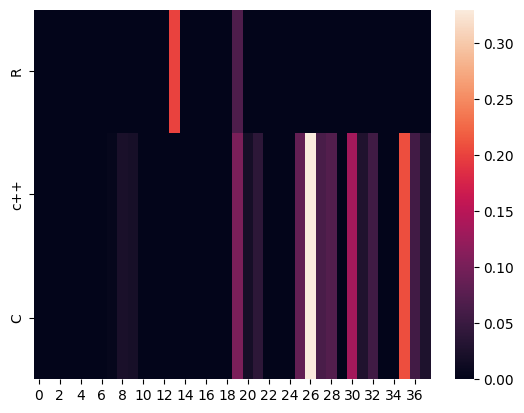

In [19]:
show_query_tf_idf_matrix("R c++ C#")

---

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archive and put the notebook files and all referenced files in there.


**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.